In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

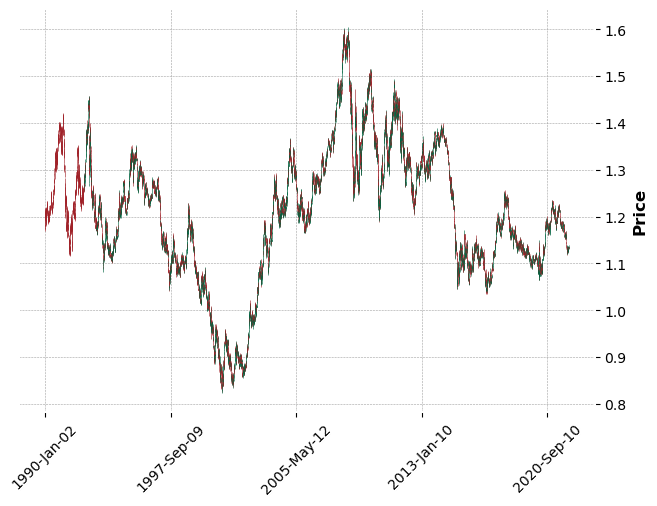

In [2]:
name_datos = 'EUR_USD'

df = pd.read_csv(name_datos + '.csv', index_col = 0)
if name_datos == 'BITCOIN':
    df = df[200:]
df.index = pd.to_datetime(df.index)
mpf.plot(df, type = 'candlestick', style = 'charles')

In [3]:
# Obtener la media móvil dados unos días concretos.

def sacar_media_movil(data, n):
    fechas = data.index
    moviendo = [np.nan] * n
    resultado = {}
    for i in range(len(fechas)):
        c, o, h, l = data.loc[fechas[i]]
        resultado[fechas[i]] = sum(moviendo) / len(moviendo)
        moviendo.append(c)
        del moviendo[0]
    return resultado

In [4]:
# Primero ponemos el valor pequeño, y luego el grande.
# Sirve para obtener las señales de compra y de venta.

def comparar_tendencias(a, b):
    final = {}
    for fecha in a:
        if a[fecha] > b[fecha]:
            final[fecha] = 'comprar'
        elif a[fecha] < b[fecha]:
            final[fecha] = 'vender'
        else:
            final[fecha] = 'nada'
    return final

In [5]:
# Igual que el de comparar_tendencias, pero para poner 3 valores.

def comparar_tendencias_3(a, b, c):
    final = {}
    for fecha in a:
        if a[fecha] > b[fecha] > c[fecha]:
            final[fecha] = 'comprar'
        elif a[fecha] < b[fecha] < c[fecha]:
            final[fecha] = 'vender'
        else:
            final[fecha] = 'nada'
    return final

In [6]:
# ini son los días de previsión, y fin son los días de propagación.
# Los días de previsión prevalecen sobre los de propagación.

def expandir_terminos(dic, ini, fin):
    indices = {}
    current = 'nada'
    fechas = list(dic)
    for i in range(len(fechas)):
        a = dic[fechas[i]]
        if a != current:
            current = a
            indices[i] = a
    final = ['nada' for elem in fechas]
    for elem in indices:
        valor = indices[elem]
        for i in range(elem, min(elem + fin + 1, len(fechas) - 1)):
            if (i == elem) or (i not in indices):
                final[i] = valor
    for elem in indices:
        valor = indices[elem]
        for i in range(max(0, elem - ini), elem + 1):
            final[i] = valor
    resul = {fechas[i]: final[i] for i in range(len(final))}
    return resul

In [7]:
# Sirve para introducir múltiples medias móviles y sacar las fechas de señales conjuntas.

def comparar_fechas(lista):
    final = {elem: 'nada' for elem in lista[0]}
    current = 'nada'
    for elem in lista[0]:
        valor = lista[0][elem]
        if valor != 'nada' and valor != current:
            t = True
            for dic in lista:
                t = t and (valor == dic[elem])
            if t == True:
                final[elem] = valor
                current = valor
    return final

In [8]:
# Método para obtener el beneficio de un conjunto de datos.

def obtener_beneficio(df, lista):
    liquido = 500
    acciones = 500 / df.iloc[0]['Open']
    for fecha in lista:
        if lista[fecha] == 'vender':
            liquido += (df.loc[fecha]['Open'] * acciones)
            acciones = 0
        elif lista[fecha] == 'comprar':
            acciones += (liquido / df.loc[fecha]['Open'])
            liquido = 0
    final = liquido + (acciones * df.iloc[-1]['Close'])
    return final

In [9]:
# Método para obtener los valores de la progresión monetaria.

def progresion_dinero(df, lista):
    final = {}
    final[df.iloc[0].name] = 1000
    liquido = 500
    acciones = 500 / df.iloc[0]['Open']
    for fecha in lista:
        if lista[fecha] == 'vender':
            liquido += (df.loc[fecha]['Open'] * acciones)
            acciones = 0
            final[fecha] = liquido
        elif lista[fecha] == 'comprar':
            acciones += (liquido / df.loc[fecha]['Open'])
            liquido = 0
    close = liquido + (acciones * df.iloc[-1]['Close'])
    final[df.iloc[-1].name] = close
    return final